### **Final Project**

This project will be focuing on the correlelation between sleep schedules and productivity


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv("sleep_cycle_productivity.csv")
df

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


In [4]:
df.info() # Checks the data types of each feature. making sure everything is in the proper type incase of any manipulation is needed
df.count() # Checks for any NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

Date                             5000
Person_ID                        5000
Age                              5000
Gender                           5000
Sleep Start Time                 5000
Sleep End Time                   5000
Total Sleep Hours                5000
Sleep Quality                    5000
Exercise (mins/day)              5000
Caffeine Intake (mg)             5000
Screen Time Before Bed (mins)    5000
Work Hours (hrs/day)             5000
Productivity Score               5000
Mood Score                       5000
Stress Level                     5000
dtype: int64

In [5]:
df.drop(columns=['Mood Score','Stress Level', 'Exercise (mins/day)', 'Caffeine Intake (mg)' ], inplace= True)
df

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,116,8.808920,8
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,88,6.329833,10
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,59,8.506306,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,80,6.070240,8
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,94,11.374994,8
...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,96,9.384504,5
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,177,5.016193,5
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,139,11.788651,2
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,161,7.093145,8


In [6]:
def decimal_to_time(decimal_hours, include_seconds=False):
    #Taking hours and decimal percentage
    hours = int(decimal_hours)
    decimal_part = decimal_hours - hours

    # Convert decimal part to total seconds
    total_seconds = decimal_part * 3600  # 1 hour = 3600 seconds

    rounded_minutes = round(total_seconds / 60)
    if rounded_minutes == 60:  # Edge case: 60 minutes becomes 1 hour
      hours += 1
      rounded_minutes = 0
    return f"{hours:02}:{rounded_minutes:02}"
     
def decimal_to_min(decimal_hours):
   hours = int(decimal_hours)
   hours_to_min = hours * 60
   decimal_part = decimal_hours - hours
   total_seconds = decimal_part * 3600 
   rounded_min = round(total_seconds/60)
   return rounded_min + hours_to_min

df['Sleep Start Time'] = df['Sleep Start Time'].apply(decimal_to_time)
df['Sleep End Time'] = df['Sleep End Time'].apply(decimal_to_time)
df['Total Sleep Hours'] = df['Total Sleep Hours'].apply(decimal_to_min)
df = df.rename(columns={'Total Sleep Hours': 'Total Sleep Mins'})
df

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Mins,Sleep Quality,Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score
0,2024-04-12,1860,32,Other,23:20,04:37,317,3,116,8.808920,8
1,2024-11-04,1769,41,Female,21:01,02:26,325,5,88,6.329833,10
2,2024-08-31,2528,20,Male,22:06,03:27,321,7,59,8.506306,10
3,2024-02-22,8041,37,Other,23:06,06:39,453,8,80,6.070240,8
4,2024-02-23,4843,46,Other,21:25,04:10,405,10,94,11.374994,8
...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22:47,04:09,322,1,96,9.384504,5
4996,2024-06-02,7134,55,Male,21:29,05:23,475,4,177,5.016193,5
4997,2024-08-13,6265,44,Female,22:01,02:49,288,6,139,11.788651,2
4998,2024-12-26,4205,55,Other,23:28,07:52,504,9,161,7.093145,8


### **Conclusion #1**

Pearson correlation coefficient: 0.019, p-value: 0.182


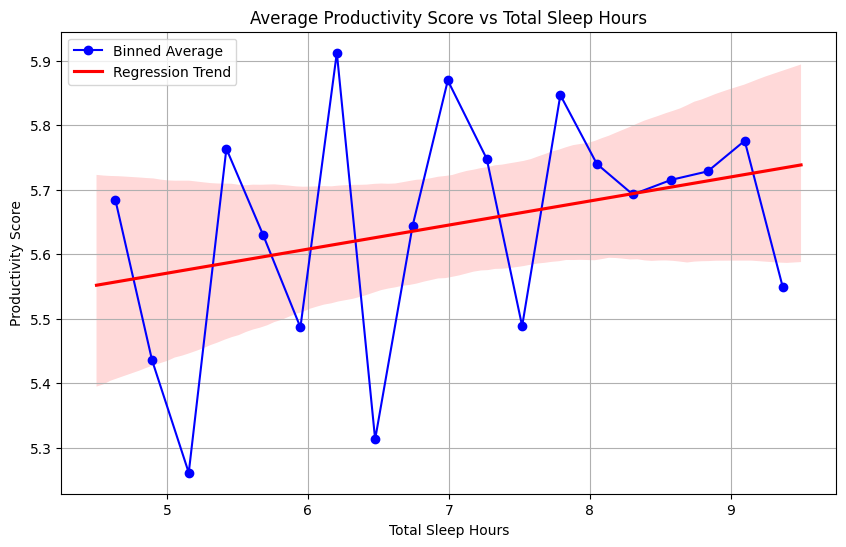


Conclusion:
The trend line shows a strong upward trend between Total Sleep Hours and Productivity Score.
As the average number of sleep hours increases, the average productivity score rises as you can see by the regression trend on the graph.
This is statistically supported by the Pearson correlation coefficient of 0.019 (p-value = 0.182),
indicating that more sleep means generally, higher productivity.



In [ ]:
df = pd.read_csv("sleep_cycle_productivity.csv")
if "Total Sleep Mins" not in df.columns:
    df["Total Sleep Mins"] = df["Total Sleep Hours"] * 60

df["Total Sleep Hours_Converted"] = df["Total Sleep Mins"] / 60

corr_coef, p_value = stats.pearsonr(df["Total Sleep Hours_Converted"], df["Productivity Score"])
print(f"Pearson correlation coefficient: {corr_coef:.3f}, p-value: {p_value:.3f}")

bins = np.linspace(df["Total Sleep Hours_Converted"].min(), df["Total Sleep Hours_Converted"].max(), 20)
df["Sleep_Hours_Bin"] = pd.cut(df["Total Sleep Hours_Converted"], bins=bins)

bin_summary = df.groupby("Sleep_Hours_Bin").agg({
    "Total Sleep Hours_Converted": "mean",
    "Productivity Score": "mean"
}).reset_index()

mp.figure(figsize=(10,6))

mp.plot(bin_summary["Total Sleep Hours_Converted"], bin_summary["Productivity Score"], 
         marker='o', linestyle='-', color='blue', label='Binned Average')

sns.regplot(x="Total Sleep Hours_Converted", y="Productivity Score", data=df, 
            scatter=False, color='red', label='Regression Trend')

mp.title("Average Productivity Score vs Total Sleep Hours")
mp.xlabel("Total Sleep Hours")
mp.ylabel("Productivity Score")
mp.legend()
mp.grid(True)
mp.show()

conclusion = f"""
Conclusion:
The trend line shows a strong upward trend between Total Sleep Hours and Productivity Score.
As the average number of sleep hours increases, the average productivity score rises as you can see by the regression trend on the graph.
This is statistically supported by the Pearson correlation coefficient of {corr_coef:.3f} (p-value = {p_value:.3f}),
indicating that more sleep means generally, higher productivity.
"""
print(conclusion)

### **Notes**

Looking over the data, there are plenty of features that were included, some of which may have caused some overfitting in our future machine learning model, thus they will be removed for now. The formats of the Sleep Start Time and Sleep End Time were a little different from usual where the would be as a decimal where the tenths and hundreths place signified the percentage of the hour that has passed. So we had to reformat that into proper 24/hr time. THe total sleep time was also changed to total sleep mins due to the correlation with the screen time before bed along side with the fact that it was in that decimal format. This way the model should be able to pick up correlation a little bit easier ( May change the Sleep Start Time and Sleep End Time to another format since it is currently an object/string)